Content Page <br/>
[Data Exploration](#data) <br/>
[Feature Extraction](#feature) <br/>
[TSU](#tsu) <br/>
[STEP](#step) <br/>
[MS-TCT](#tct) <br/>



# DATA EXPLORATION
<a id='data'></a>


In [4]:
#Common Imports
!pip install ipyfilechooser
!pip install wandb
import os
from dotenv import load_dotenv

!wandb login os.getenv("WANDB_KEY")
from ipyfilechooser import FileChooser
import ipywidgets as widgets
import sys
sys.path.append('./Commons')
import find_directory
import find_fileName


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\user/.netrc


# Feature Extraction

The following section will depict the steps to extract features from videos. This feature extraction will be performed using v-iashin feature extraction which can be found https://github.com/v-iashin/video_features .
<a id='feature'></a>

## Prerequisites 
1. Store the videos that you wish to extract features from in the folder Data/Videos_MP4

## Create a Txt File containing all the video names

This cell will create a txt file based on all the video names within the Data/Videos_MP4 folder. This txt file will be used in the feature extraction step.

In [ ]:
from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir("../Data/Videos_mp4") if isfile(join("../Data/Videos_mp4", f))]
with open('../Data/Videos_mp4/video_name.txt', 'w') as f:

    for name in onlyfiles:
        name = "../../../Data/Videos_mp4/" + name
        f.write(name)
        f.write('\n')
f.close()

In [ ]:
%cd ./FeatureExtraction/video_features

## Select the type of stream for feature extraction

Available values are RGB, Flow and null.


Null means that the stream will be default which will be RGB+Flow

In [ ]:
stream = widgets.Dropdown(
    options=['rgb', 'flow', 'null'],
    value='rgb',
    description='Stream:',
    disabled=False,
)
display(stream)


## Feature Extraction

The following cell will perform the feature extraction.

### Prerequisites
1. Ensure that the folder "ExtractedFeatures" exist in the path of "Codes/TSU/Toyota_Smarthome/pipline"

In [3]:
chosen_stream = stream.value
%run main.py feature_type="i3d" device="cuda:0" file_with_video_paths="../../../Data/Videos_mp4/video_name.txt" output_path="../../../Codes/TSU/Toyota_Smarthome/pipline/ExtractedFeatures" on_extraction=save_numpy streams=$chosen_stream 

NameError: name 'stream' is not defined

In [ ]:
%cd ../../

# Training Model (TSU)
<a id='tsu'></a>

The following cells will depict the training of the model through the use of the Extracted Features completed previously. For further details, each cell will explain its functionality and purpose.

## Imports

The following cell will import the various libraries required by the training of model. If there is any libraries that is not installed. Please install into the virtual environment to ensure that the training of model is able to run successfully.

In [5]:
# @title Run this!!
from os import listdir
from os.path import isfile, join
import csv
import os
import shutil
from shutil import SameFileError
import json
from pathlib import Path
import torch

In [6]:
%cd ./TSU/Toyota_Smarthome/pipline

c:\Users\user\Documents\GitHub\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline


## Curating the Extracted Features

The following cell will curate the Extracted Features into Features that the training requires.

Requirements:
1. Ensure that the Feature Extraction is completed **OR** Features are stored in the "ExtractedFeatures" folder in "Codes/TSU/Toyota_Smarthome/pipline"
2. Ensure that the folder named = "CuratedExtractedFeatures" exist in the directory "Codes/TSU/Toyota_Smarthome/pipline"
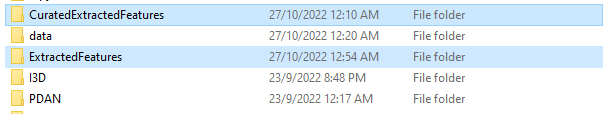

In [ ]:
onlyfiles = [f for f in listdir("./ExtractedFeatures/i3d/") if isfile(join("./ExtractedFeatures/i3d/", f))]

f2 = open("./data/smarthome_CS_51.json")
data = json.load(f2)

diction = {}
RGBCount = 0

for i in onlyfiles:
  if i.__contains__("_rgb"):
    j = i.replace("_rgb","")
    shutil.copyfile("./ExtractedFeatures/i3d/"+i, "./CuratedExtractedFeatures/"+j)
    j = j.replace(".npy","")
    diction[j] = data.get(j)
    RGBCount += 1
print("Total RGB files extracted: " + str(RGBCount))
f2.close()

## Compiling the Curated Extracted Features into a JSON 

The following cell will compile the curated features into a JSON object for training purposes.
1. Ensure that the folder named = "CuratedFeatures" exist in the directory "Codes/TSU/Toyota_Smarthome/pipline"
2. Ensure that the folder named = "data" exist in the directory "Codes/TSU/Toyota_Smarthome/pipline"

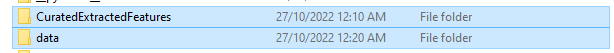

In [ ]:
with open('./data/smarthome_CS_32.json', 'w', encoding='utf-8') as f:
    json.dump(diction, f, ensure_ascii=False)
print("Smarthome_CS_32.json has been generated")

## Selecting the variables


The following cell will require the user to select the specific value for training of the model.
1. Ensure that the folder named = "TrainedModel" exist in the current directory of the notebook and it is empty.
<br></br>

2. Mode {Unique Values}
	1. **There is 4 different modes RGB, FLOW, RGB+FLOW or FLOW+RGB**
<br></br>

3. Train {Boolean}
	1. **Determine if this is a training or testing.**
<br></br>

4. Epoch {Int}
	1.  **Defined as the total number of iterations of all the training data in one cycle for training the machine learning model.**
<br></br>

5. Batch Size {Int}
	1. **Defined as the number of training examples utilized in one iteration.**
<br></br>

6. Output {Folder}
	1. **This is the path of the output folder.**
<br></br>

In [7]:
#Display Train Dropdown Menu
Train = widgets.Dropdown(
    options=[True, False],
    value=True,
    description='Train:',
    disabled=False,
)
display(Train)

#Display Mode Dropdown Menu
Mode = widgets.Dropdown(
    options=['rgb', 'flow', 'flow+rgb', 'rgb+flow'],
    value='rgb',
    description='Mode:',
    disabled=False,
)
display(Mode)

#Display Epoch Dropdown Menu
epoch = widgets.IntText(
    value=140,
    description='Epoch:',
    disabled=False
)
display(epoch)

#Display Batch Size Dropdown Menu
batchsize = widgets.IntText(
    value=1,
    description='Batch Size:',
    disabled=False
)
display(batchsize)



Dropdown(description='Train:', options=(True, False), value=True)

Dropdown(description='Mode:', options=('rgb', 'flow', 'flow+rgb', 'rgb+flow'), value='rgb')

IntText(value=140, description='Epoch:')

IntText(value=1, description='Batch Size:')


## Select the output Path

The following cell requires the user to pick the folder where they want to store the trained model at.

In [8]:
filePathChooser = FileChooser()
filePathChooser.show_only_dirs = True
filePathChooser.default_path = os.getcwd()
filePathChooser.sandbox_path = os.getcwd()
display(filePathChooser)


FileChooser(path='c:\Users\user\Documents\GitHub\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline…

In [9]:

filePathInput = filePathChooser.selected
print(filePathInput)



c:\Users\user\Documents\GitHub\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\poop\


## Training the Model

The following cell will trained the model based on the variables that the user has selected previous.

In [10]:
%run ./train.py \
-dataset TSU \
-mode $Mode.value \
-split_setting CS \
-model PDAN \
-train $Train.value \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch $epoch.value \
-batch_size $batchsize.value \
-comp_info TSU_CS_RGB_PDAN \
-load_model ./PreTrainedModel/PDAN_TSU_RGB\
-rgb_root ./CuratedExtractedFeatures \
-featurePath ./data/smarthome_CS_32.json \
-outputTrain $filePathInput

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: chengliang. Use `wandb login --relogin` to force relogin


HIIIIII i7fwer0y
Random_SEED!!!: 0
PDAN
batch_size: 1
cuda_avail True
RGB mode ./CuratedExtractedFeatures


100%|██████████| 536/536 [00:01<00:00, 401.20it/s] 
c:\Users\user\Documents\GitHub\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\models.py:88: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.key_conv.weight, mode='fan_out')
c:\Users\user\Documents\GitHub\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\models.py:89: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.value_conv.weight, mode='fan_out')
c:\Users\user\Documents\GitHub\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\models.py:90: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.query_conv.weight, mode='fan_out')
c:\Users\user\Documents\GitHub\ict3104-team09-2022-binder\Codes\TSU\Toyota_Smarthome\pipline\models.py:91: UserWarning: nn.init.normal is now deprecated in favor of nn.in

you are processing PDAN
loaded ./PreTrainedModel/PDAN_TSU_RGB
pytorch_total_params 5804083
num_channel: 512 input_channnel: 1024 num_classes: 51
0.0002
Epoch 0/2
----------


c:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


## Evaluate Model

The following cell will evaluate the model and return the result in a CSV file located in EvaluateModel/Evaluation.csv

In [ ]:
%run test.py \
-dataset TSU \
-mode rgb \
-split_setting CS \
-model PDAN \
-train False \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch 5 \
-batch_size 2 \
-comp_info TSU_CS_RGB_PDAN \
-load_model ./PreTrainedModel/PDAN_TSU_RGB \
-rgb_root ./Data/smarthome_CS_32.json \
-featurePath ./CuratedExtractedFeatures\
-outputTest ./EvaluateModel 

# Video Inference 

The following section will depict the steps taken to perform the video Inference for TSU.

## Limitations
1. The video inference can only be performed one at a time. Hence user have to select the video that they wish to perform inference on. 


## Select the specific video

The following cells requires the user to pick the specific video that they want to do inference on

In [ ]:
vid = FileChooser('../../../../Data/Videos_mp4')
display(vid)


In [ ]:
videoPath = vid.selected
videoInput = vid.selected_filename


## Select the output Path

The following cell requires the user to pick the folder where they want to store the completed video inference at. 

There will be a folder named "InferencedVideos" available for users to store their videos if they wished to.

In [ ]:
filePathChooser = FileChooser()
filePathChooser.show_only_dirs = True
filePathChooser.default_path = os.getcwd()
display(filePathChooser)

In [ ]:
filePathInput = filePathChooser.selected_path

## Video Inference Step

The following cell will run the video inference for TSU.

**Please ensure that you have completed the previous two steps to select the specific video and the output path.**

In [ ]:
%run inference.py \
-dataset TSU \
-mode rgb \
-split_setting CS \
-model PDAN \
-train False \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch 5 \
-batch_size 2 \
-comp_info TSU_CS_RGB_PDAN \
-load_model ./PreTrainedModel/PDAN_TSU_RGB \
-rgb_root ./data/smarthome_CS_51.json \
-featurePath ./CuratedExtractedFeatures \
-VideoInputTest $videoInput \
-video_path $videoPath \
-annotations ./Annotation \
-filepath $filePathInput

<h1>Step Imports</h1>
<br></br>
<a id='step'></a>

**Run the following cell before anything**

In [ ]:
# %cd ../../../
!{sys.executable} -m pip install numpy opencv-python
!{sys.executable} -m pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111
!{sys.executable} -m pip install ipywidgets

from pydoc import describe
from colorama import Style
from ipyfilechooser import FileChooser
import os
import ipywidgets as widgets
from IPython.display import HTML
import cv2
import numpy as np
import glob



<h1>Step Inference</h1>

<h3>The following cell will execute inference on selected pretrain model.</h3>

1. Ensure that the folder named = "pretrained" exist in the Step directory of the notebook and it is empty.
<br></br>

2. Select Pretrained Model 
	1. **When clicked, displays all the available pretrained model in the pretrained folder in step**
<br></br>

3. Select Video Frame Folder 
	1. **Select a Folder containing video frames of desired video**
<br></br>

4. Select folder to save Inference Results
	1.  **Folder to save results from inferrence**
<br></br>

<br></br>

In [ ]:
# Step Inference
preTrainedModelPicker = FileChooser(os.getcwd())
preTrainedModelPicker.filter_pattern = "*.pth"
preTrainedModelPicker.title = "Select pre-trained model"
preTrainedModelPicker.default_path = os.path.join(os.getcwd(),"step/pretrained")

fileList = os.listdir(os.path.join(os.getcwd(),"step/pretrained"))
print(fileList)
preTrainedDropDown = widgets.Dropdown(
    options=fileList,
    value=fileList[0],
    description='Select Pre-trained Model:',
    disabled=False,
)

fcSelectFrameFolder = FileChooser(os.getcwd())
fcSelectFrameFolder.show_only_dirs = True
fcSelectFrameFolder.title = "Select video frame folder to run inference on:"
fcSelectFrameFolder.default_path = os.path.join(os.getcwd(),'step/datasets/demo/frames')
fcSelectFrameFolder.sandbox_path = os.path.join(os.getcwd(),'step/datasets/demo/frames')

fcSelectFolderFileList = os.listdir(os.path.join(os.getcwd(),"step/datasets/demo/frames"))
fcSelectFolderDropdown = widgets.Dropdown(
    options=fcSelectFolderFileList,
    value=fcSelectFolderFileList[0],
    description='Select Folder:',
    disabled=False,
)
print (os.listdir(os.path.join(os.getcwd(),"step/datasets/demo/frames")))

fcSelectFrameResultFolder = FileChooser(os.getcwd())
fcSelectFrameResultFolder.show_only_dirs = True
fcSelectFrameResultFolder.title = "Select folder to save inference results to:"
fcSelectFrameResultFolder.default_path = os.path.join(os.getcwd(),'step/datasets/demo/results')



selectVideoFrameFolder = widgets.HBox([widgets.Label("Save inference result to:"),fcSelectFrameFolder])
confirmBtn2 = widgets.Button(description="Confirm")
resetBtn2 = widgets.Button(description="Reset")
buttonsHbox2 = widgets.HBox([confirmBtn2])
inferrenceOutput = widgets.Output()
vbox2 = widgets.VBox([preTrainedDropDown,fcSelectFolderDropdown,buttonsHbox2, inferrenceOutput])
def on_confirm_clicked2(b):
    with inferrenceOutput:
        # print("Running inference with pre-trained model: ", os.path.normpath( preTrainedModelPicker.selected))
        # print("Running inference on video frame folder: ", fcSelectFrameFolder.selected_path)
        # print("Saving results to: ", fcSelectFrameResultFolder.selected_path)
        # print(os.path.join(os.getcwd(),"step/datasets/demo/frames/"+str(fcSelectFolderDropdown.value)))
        # %run ./step/demo.py {os.path.join(fcSelectFrameFolder.selected_path,fcSelectFrameFolder.selected_filename)} {os.path.join(fcSelectFrameResultFolder.selected_path,fcSelectFrameResultFolder.selected_filename)} {os.path.normpath( preTrainedModelPicker.selected)}
        %run ./step/demo.py {os.path.join(os.getcwd(),"step/datasets/demo/frames/"+fcSelectFolderDropdown.value)} {os.path.join(os.getcwd(),'step/datasets/demo/results')} {os.path.join(os.getcwd(),"step/pretrained/"+preTrainedDropDown.value)}
        print("Inference completed!")
        print("Results saved to: ", "step\datasets\demo\results")
def on_reset_clicked2(b):
    inferrenceOutput.clear_output()
    fcSelectFrameFolder.reset()
    fcSelectFrameResultFolder.reset()
confirmBtn2.on_click(on_confirm_clicked2)
resetBtn2.on_click(on_reset_clicked2)
display(vbox2)


<h1>Step Frames Extraction</h1>

<h3>The following cell will execute frame extraction on folder containing videos</h3>

1. Ensure that the folder named = "input" exists in the dataset Step directory of the notebook.
<br></br>

2. Select Folder containing video you wish to extract
	1. **Displays all the available pretrained model in the pretrained folder in step**
<br></br>
3. Click on confirm 
    1. **Takes the input provided and runs a script to extract frames from video**

3. Results Output
    1. **Frames of inputted videos are extracted at a rate of 30 frames per second**
    2. **Extracted frames can be located at step\datasets\ava.**

<br></br>

In [ ]:
fcSelectVideo = FileChooser(os.getcwd())
fcSelectVideo.title = "Select video folder to run frame extraction on:"
fcSelectVideo.default_path = os.path.join(os.getcwd(),'step/datasets/input/')
fcResults = FileChooser(os.getcwd())
fcResults.show_only_dirs = True
fcResults.title = "Select folder to save frame extraction results to:"
fcResults.default_path = os.path.join(os.getcwd(),'step/datasets/ava/')


confirmBtn = widgets.Button(description="Confirm")
resetBtn = widgets.Button(description="Reset")
buttonsHbox = widgets.HBox([confirmBtn,resetBtn])


output = widgets.Output()
vbox = widgets.VBox([fcSelectVideo,fcResults,buttonsHbox, output])
def on_confirm_clicked(b):
    with output:
        print("Running inference on video : ", os.path.join(fcSelectVideo.selected_path,fcSelectVideo.selected_filename))
        print("Saving results to: ", fcResults.selected_path)
        %run ./step/scripts/extract_clips2.py {os.path.join(fcSelectVideo.selected_path,fcSelectVideo.selected_filename)} {os.path.join(fcResults.selected_path,fcResults.selected_filename)}
        output.clear_output()
        print("Frame extraction completed!") 
        
def on_reset_clicked(b):
    output.clear_output()
    fcSelectVideo.reset()
    fcResults.reset()
confirmBtn.on_click(on_confirm_clicked)
resetBtn.on_click(on_reset_clicked)

display(vbox)



<h3>Step Training/Testing prerequisite generate label for training and valuation</h3>
The following cell will transform training and valuation annotation files into pickle files 

1. Ensure that there is folder named 'label' in  the path 'step/datasets/ava/label/'.
<br></br>
![image](../../../../../../../C:/Users/user/Documents/GitHub/ict3104-team09-2022-binder/Codes/STEP/folder.png)
2. Select training CSV 
	1. **Select training annotation CSV from a list of annotation dataset to be transformed into a pickle file**
<br></br>
3. Select valuation CSV 
    1. **Select valuation annotation CSV from a list of annotation dataset to be transformed into a pickle file**

3. Results Output
    1. **Generates 2 pickle file for training at step\datasets\ava\label**
    <br></br>
![image](../../../../../../../C:/Users/user/Documents/GitHub/ict3104-team09-2022-binder/Codes/STEP/Untitled.png)

<br></br>

In [ ]:
# Step training generating label
# trainingCsv = FileChooser(os.getcwd())
# trainingCsv.filter_pattern = "*.csv"
# trainingCsv.title = "Select training CSV file"
# trainingCsv.default_path = os.path.join(os.getcwd(),"step/datasets/ava/label/")
valuationCsv = FileChooser(os.getcwd())
valuationCsv.filter_pattern = "*.csv"
valuationCsv.title = "Select valuation CSV file"
valuationCsv.default_path = os.path.join(os.getcwd(),"step/datasets/ava/label/")

trainingCSVdropdown = widgets.Dropdown(
    options=os.listdir(os.path.join(os.getcwd(),"step/datasets/ava/label/")),
    value=os.listdir(os.path.join(os.getcwd(),"step/datasets/ava/label/"))[0],
    description='Select Training CSV:',
    disabled=False,
)
valuationCSVdropdown = widgets.Dropdown(
    options=os.listdir(os.path.join(os.getcwd(),"step/datasets/ava/label/")),
    value=os.listdir(os.path.join(os.getcwd(),"step/datasets/ava/label/"))[0],
    description='Select Valuation CSV:',
    disabled=False,
)

trainingConfirmBtn = widgets.Button(description="Confirm")
trainingResetBtn = widgets.Button(description="Reset")
trainingButtonsHbox = widgets.HBox([trainingConfirmBtn])
trainingOutput = widgets.Output()
trainingVbox = widgets.VBox([trainingCSVdropdown,valuationCSVdropdown,trainingButtonsHbox, trainingOutput])
def on_training_confirm_clicked(b):
    with trainingOutput:
        print(trainingCSVdropdown.value)
        filePathTraining = os.path.join(os.getcwd(),"step/datasets/ava/label/"+trainingCSVdropdown.value)
        filePathValuation = os.path.join(os.getcwd(),"step/datasets/ava/label/"+valuationCSVdropdown.value)
        %run ./step/scripts/generate_label.py {filePathTraining}
        print("done generating training label")
        %run ./step/scripts/generate_label.py {filePathValuation}
        print("done generating valuation label")
       

trainingConfirmBtn.on_click(on_training_confirm_clicked)
display(trainingVbox)

<h3> Step Training </h3>
The following cell will train the model.
<br></br>
<h4>Prerequisites</h4>
1) Training video frames are extracted and saved at Codes\STEP\datasets\ava\frames

![image](STEP/frames.png)
<br></br>
2) Training pickle file is generated 

![image](../../../../../../../C:/Users/user/Documents/GitHub/ict3104-team09-2022-binder/Codes/STEP/Untitled.png)
<br></br>


1. Epoch {Int}
	1.  **Defined as the total number of iterations of all the training data in one cycle for training the machine learning model.**
<br></br>

2. Batch Size {Int}
	1. **Defined as the number of training examples utilized in one iteration.**
<br></br>

3. Worker {Int}
	1. **Defined as the number of worker threads**


<br></br>

In [ ]:
# Step Training Model
from cProfile import label
data_root="step/datasets/ava/"
save_root="step/datasets/ava/cache/"
pretrain_path="step/pretrained/ava_cls.pth"

name="STEP"
base_net="i3d"
det_net="two_branch"
resume_path="Auto"

T=3
max_iter=3    # index starts from 1
iterative_mode="temporal"
anchor_mode="1"
temporal_mode="predict"
pool_mode="align"
pool_size=7

# training schedule
num_workers=4
max_epochs=14
batch_size=1
optimizer="adam"
base_lr=7.5e-5
det_lr0=1.5e-4
det_lr=7.5e-4
save_step=11465
print_step=500
scheduler="cosine"
milestones="-1"
warmup_iters=1000

# losses
dropout=0.3
fc_dim=256
lambda_reg=5
lambda_neighbor=1
cls_thresh="0.2,0.35,0.5"
reg_thresh="0.2,0.35,0.5"
max_pos_num=5
neg_ratio=2
NUM_SAMPLE=-1
topk=300
evaluate_topk=300

# data augmentation / normalization
scale_norm=2    # for i3d
do_flip="True"
do_crop="True"
do_photometric="True"
do_erase="True"
freeze_affine="True"
freeze_stats="True"
outputTrain = widgets.Output()
dataFileFolderPath = FileChooser(os.getcwd())
dataFileFolderPath.title = "Select data file folder"
dataFileFolderPath.default_path = os.path.join(os.getcwd(),"step/datasets/ava/")
dataFileFolderPath.show_only_dirs = True
saveFileFolderPath = FileChooser(os.getcwd())
saveFileFolderPath.title = "Select save file folder"
saveFileFolderPath.default_path = os.path.join(os.getcwd(),"step/datasets/ava/cache/")
saveFileFolderPath.show_only_dirs = True
epochLabel = widgets.Label("Epoch")
epochInput = widgets.IntText();
epochInput.value = 14
batchLabel = widgets.Label("Batch")
batchInput = widgets.IntText();
batchInput.value = 1
workerLabel = widgets.Label("Worker")
workerInput = widgets.IntText();
workerInput.value = 4


dataFilePath = os.path.join(os.getcwd(),"step/datasets/ava/")
saveFilePath = os.path.join(os.getcwd(),"step/datasets/ava/cache/")
pretrainFilePath = os.path.join(os.getcwd(),"step/pretrained/ava_cls.pth")

epochHbox = widgets.HBox([epochLabel,epochInput])
batchHbox = widgets.HBox([batchLabel,batchInput])
workerHbox = widgets.HBox([workerLabel,workerInput])
startButton = widgets.Button(description="Start")
startButton.style.button_color = 'lightgreen'
startButton.style.font_weight = 'bold'
def startOnClick(b):
    with outputTrain:
        %run ./step/train.py --data_root $dataFilePath --save_root $saveFilePath \
        --name $name --pretrain_path $pretrainFilePath --resume_path $resume_path \
        --base_net $base_net --det_net $det_net --max_iter $max_iter --T $T \
        --iterative_mode $iterative_mode --anchor_mode $anchor_mode --anchor_mode $anchor_mode --temporal_mode $temporal_mode \
        --pool_mode $pool_mode --pool_size $pool_size --save_step $save_step --topk $topk --evaluate_topk $evaluate_topk \
        --num_workers $workerInput.value --max_epochs $epochInput.value --batch_size $batchInput.value --print_step $print_step \
        --optimizer $optimizer --base_lr $base_lr --det_lr $det_lr --det_lr0 $det_lr0 --milestones $milestones \
        --scale_norm $scale_norm --do_flip $do_flip --do_crop $do_crop --do_photometric $do_photometric --do_erase $do_erase \
        --fc_dim $fc_dim --dropout $dropout --NUM_SAMPLE $NUM_SAMPLE --scheduler $scheduler --warmup_iters $warmup_iters \
        --cls_thresh $cls_thresh --reg_thresh $reg_thresh --max_pos_num $max_pos_num --neg_ratio $neg_ratio \
        --freeze_affine $freeze_affine --freeze_stats $freeze_stats --lambda_reg $lambda_reg --lambda_neighbor $lambda_neighbor
startButton.on_click(startOnClick)
display(epochHbox, batchHbox, workerHbox, startButton, outputTrain)

<h3>Step Testing</h3>

<h4>The following cell would perform testing of selected pretrained model.</h4>
<br></br>
<h4>Prerequisites</h4>

1) Valuation pickle file is generated 

![image](../../../../../../../C:/Users/user/Documents/GitHub/ict3104-team09-2022-binder/Codes/STEP/Untitled.png)
<br></br>

1. Select Pretrain file
    1. **Select pretrain model to be tested**
2. Output 
    1. **Testing output result would be saved to Codes\STEP\datasets\ava\cache completion of testing.**

In [ ]:
pretrainedTestFs = FileChooser(os.getcwd())
pretrainedTestFs.title = "Select pretrained file"
pretrainedTestFs.default_path = os.path.join(os.getcwd(),"step/pretrained/")
pretrainedTestFs.filter_pattern = "*.pth"
testOutput = widgets.Output()
testButton = widgets.Button(description="Test")
testButton.style.button_color = 'lightgreen'
testButton.style.font_weight = 'bold'

selectPretrainedLabel = widgets.Label("Select pretrained file to do testing:")
selectPretrainedLabel.style.font_weight = 'bold'
pretrainedFileList = os.listdir(os.path.join(os.getcwd(),"step/pretrained/"))
preTrainedDropDown = widgets.Dropdown(
    options=pretrainedFileList,
    value=pretrainedFileList[0],
    description='Pretrained:',
    disabled=False,
)
def testOnClick(b):
    with testOutput:
        testingFilePath = os.path.join(os.getcwd(),"step/pretrained/",preTrainedDropDown.value)
        %run ./step/test.py {testingFilePath}
        
testButton.on_click(testOnClick)
    
display(selectPretrainedLabel,preTrainedDropDown, testButton, testOutput)